[   INFO   ] TensorflowPredict: Successfully loaded graph file: `../models/deeptemp-k16-3.pb`


Global BPM: 87.0
Local BPM: [87. 84.]


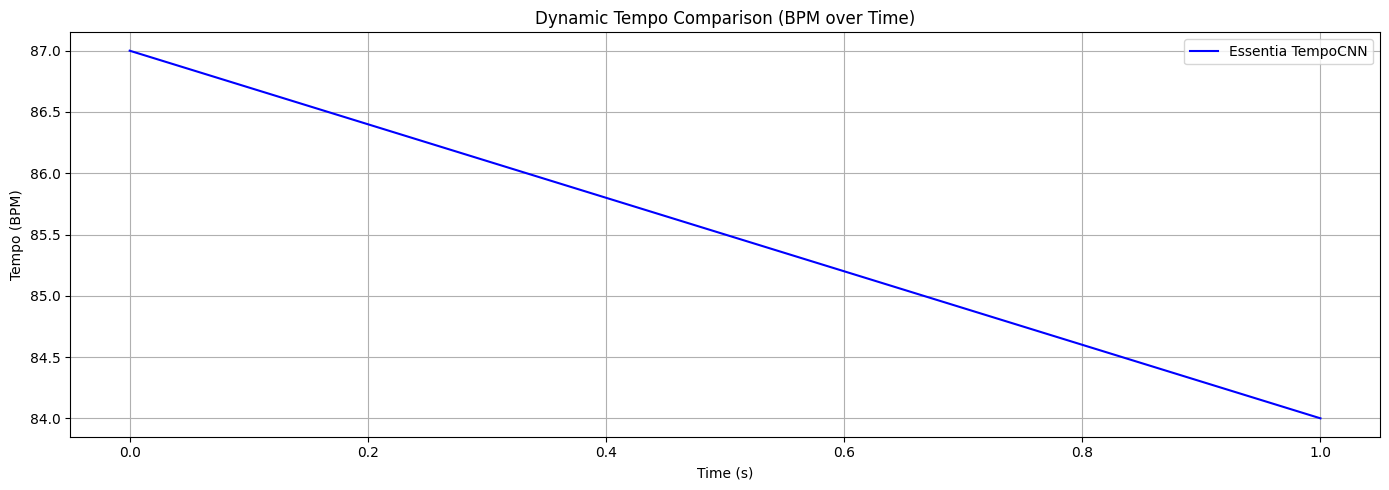

In [5]:
import essentia.standard as es
import librosa
import numpy as np
import matplotlib.pyplot as plt

audio_path = "../violin_recording.wav"

window_size = 10.0
hop_size = 1.0
frame_rate = 100
window_frames = int(window_size * frame_rate)
hop_frames = int(hop_size * frame_rate)

signal, sr = librosa.load(audio_path, sr=None)

# Remove silence (top_db can be adjusted for sensitivity)
y_trimmed, index = librosa.effects.trim(signal, top_db=20)

shared_times = []
for start in range(0, len(signal) - window_frames, hop_frames):
    shared_times.append(start / frame_rate)

audio_11khz = es.MonoLoader(filename=audio_path, sampleRate=11025)()
global_bpm, local_bpm, local_probs = es.TempoCNN(graphFilename='../models/deeptemp-k16-3.pb')(audio_11khz)
print(f"Global BPM: {global_bpm}")
print(f"Local BPM: {local_bpm}")

# Convert local_bpm to values per frame (86 fps by default)
cnn_frame_rate = 86
cnn_times = np.arange(len(local_bpm)) / cnn_frame_rate

plt.figure(figsize=(14, 5))
plt.plot(local_bpm, label='Essentia TempoCNN', color='blue')

plt.title("Dynamic Tempo Comparison (BPM over Time)")
plt.xlabel("Time (s)")
plt.ylabel("Tempo (BPM)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()